## Visualising the Gender Gap in College Degrees
In this project, I will be visualising the gender gap of Men and Women with college degrees based on subject.
The data was released by the Department of Education Statistics.

## Reading in the data

In [1]:
#importing the required libraries
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

In [2]:
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


### Plotting the gender gap in STEM subjects

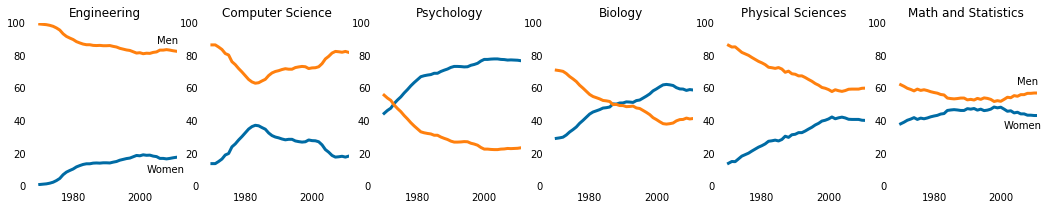

In [3]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18, 3))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom=False, top=False, left=False, right=False)
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

### Defining categories for all subjects

In [4]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

### Plotting the gender gap in all subjects

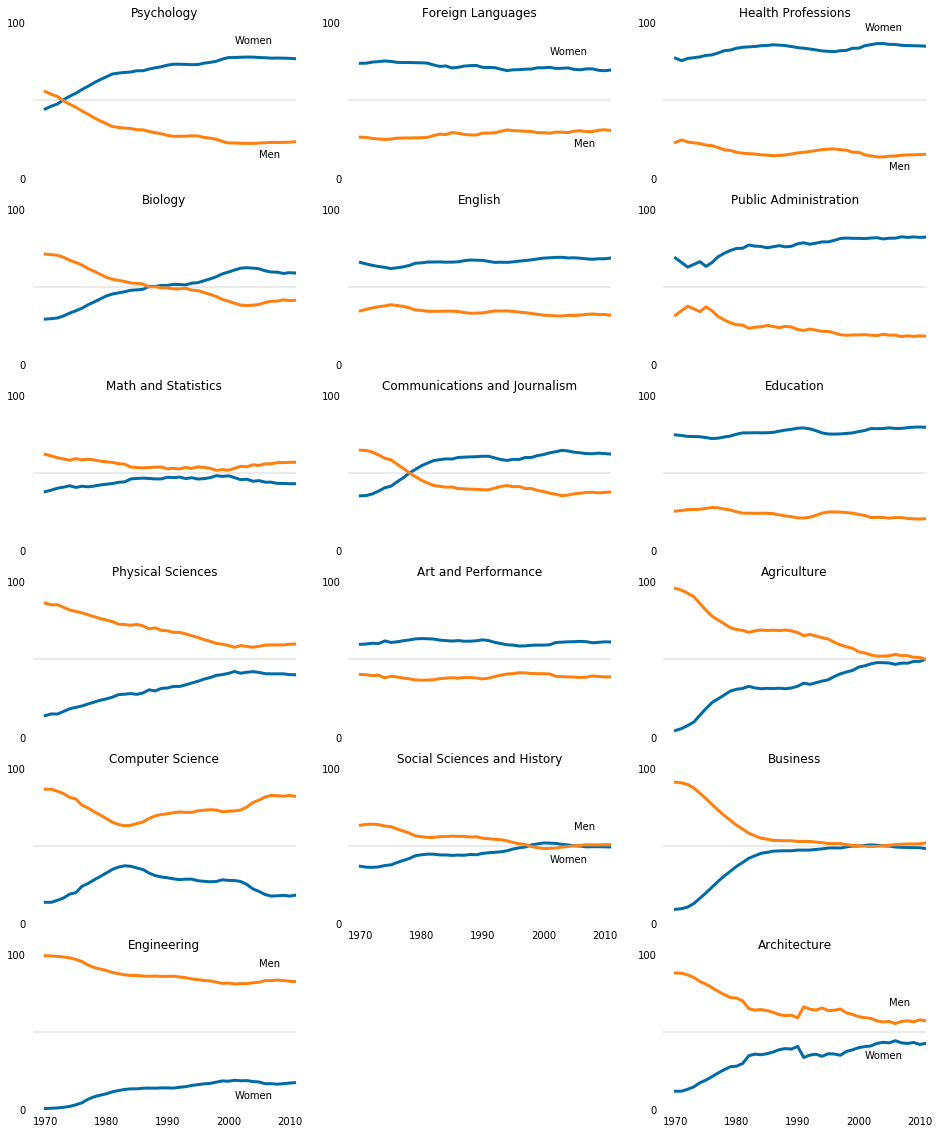

In [5]:
fig=plt.figure(figsize=(16,20))

cat_index=[stem_cats, lib_arts_cats, other_cats]

for x in range(0,3):
    for sp in range (0,len(cat_index[x])*3,3): 
        ax=fig.add_subplot(6,3, sp+1+x)
        degree_index=int(sp/3)
        ax.plot(women_degrees['Year'],women_degrees[cat_index[x][degree_index]],c=cb_dark_blue,linewidth=3, label='Women')
        ax.plot(women_degrees['Year'],100-women_degrees[cat_index[x][degree_index]],c=cb_orange,linewidth=3,label='Men')
        ax.set_title(cat_index[x][degree_index])
        ax.set_ylim(0,100)
        ax.set_xlim(1968,2011)
        ax.tick_params(bottom=False, top=False, left=False, right=False,labelbottom=False) 
        ax.set_yticks([0,100])
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
        for key, spine in ax.spines.items():
            spine.set_visible(False)
            
        if women_degrees[cat_index[x][degree_index]].iloc[-1] >50:
            value_label= women_degrees[cat_index[x][degree_index]].iloc[-1]+10
        else:
            value_label=women_degrees[cat_index[x][degree_index]].iloc[-1] -10
        
        if sp==0:
            ax.text(2001,value_label,'Women')
            ax.text(2005,100-value_label,'Men')
        if sp==16 or sp==15 or (sp==12 and x==1):
               
            ax.text(2001,value_label,'Women')
            ax.text(2005,100-value_label,'Men')
            ax.tick_params(labelbottom=True)
            
            
            
plt.savefig('gender_degrees.png')
    
         
   

Female majority subjects for most of the time of 1970 to 2010 include: Psychology, Foreign Languages, Health Professionals, English, Public Administration, Education, Art and Performance. This only included 1 out of 6 STEM subjects, and mostly consists of "Liberal Arts" or "Humanities" subjects.

Whilst male majority subjects include Physical Sciences, Computer Science, Engineering, Architecture, Agriculture, Business

However, we can see that there are some subjects where the gender gap has decreased over time significantly: e.g Agriculture, Business and Architecture between 1970 and 2010. 

On the other hand, some subjects the gender gap has increased over time significantly: e.g Psychology.

Additionally, here are some subjects where the gender gap has remained fairly constant: e.g Math and Statistics, English, Foreign Languages, Art and Performance.

Finally, there are some subjects have seen a switch in the gender gap where Men used to be the majority, but now Female are e.g Biology and Communications and Journalism.